# Stroke units

__TO DO __ Write a bit about what data we have on them ok

## Notebook setup

In [1]:
import stroke_maps.load_data
import stroke_maps.catchment

import pandas as pd
import matplotlib.pyplot as plt

## Load the stroke unit data

In [2]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

In [3]:
df_units.head(3).T

postcode,SY231ER,CB20QQ,L97AL
stroke_team,Bronglais Hospital (Aberystwyth),"Addenbrooke's Hospital, Cambridge","University Hospital Aintree, Liverpool"
short_code,AB,AD,AI
ssnap_name,Bronglais Hospital,Addenbrooke's Hospital,University Hospital Aintree
use_ivt,1,1,1
use_mt,0,1,1
use_msu,0,1,1
transfer_unit_postcode,nearest,nearest,nearest
lsoa,Ceredigion 002A,Cambridge 013D,Liverpool 005A
lsoa_code,W01000512,E01017995,E01006654
region,Hywel Dda University Health Board,NHS Cambridgeshire and Peterborough ICB - 06H,NHS Cheshire and Merseyside ICB - 99A


## Plot the unit locations

First load the outline of England and Wales:

In [4]:
gdf_ew = stroke_maps.load_data.englandwales_outline()

Then load in the stroke unit coordinates:

In [5]:
gdf_units = stroke_maps.load_data.stroke_unit_coordinates()

Merge in the unit services information:

In [6]:
gdf_units = pd.merge(
    gdf_units, df_units[['use_ivt', 'use_mt']],
    left_index=True, right_index=True, how='right'
)

Plot the country outlines and the unit locations using matplotlib:

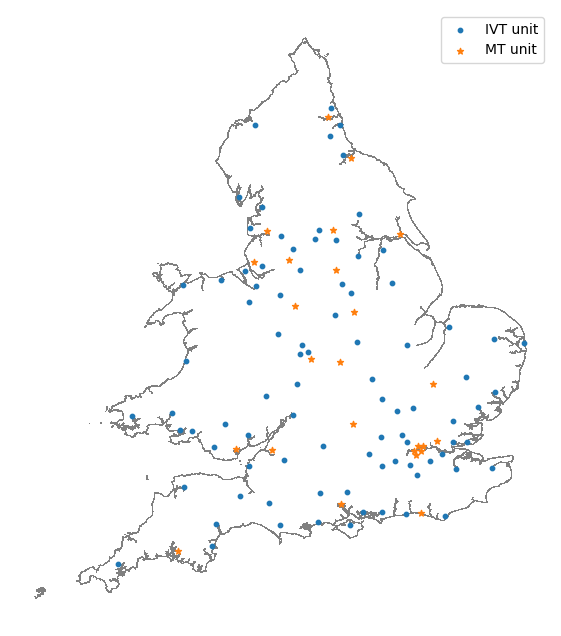

In [8]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the country outlines:
gdf_ew.plot(
    ax=ax,              # Set which axes to use for plot
    antialiased=False,  # Avoids artefact boundary lines
    facecolor='none',
    edgecolor='grey',
    linewidth=0.2,
    )

# Pick out which stroke units to plot:
mask_ivt = ((gdf_units['use_ivt'] == 1) & (gdf_units['use_mt'] == 0))
mask_mt = (gdf_units['use_mt'] == 1)

# IVT units:
ax.scatter(
    gdf_units.loc[mask_ivt, 'geometry'].x,
    gdf_units.loc[mask_ivt, 'geometry'].y,
    marker='o',
    label='IVT unit',
    s=10,  # size
    )

# MT units:
ax.scatter(
    gdf_units.loc[mask_mt, 'geometry'].x,
    gdf_units.loc[mask_mt, 'geometry'].y,
    marker='*',
    label='MT unit',
    s=20,  # size
    )

# Remove the axis border, ticks, labels...
ax.axis('off')

# Add legend:
ax.legend()

plt.show()